<a href="https://colab.research.google.com/github/Jeet2561/13sep_Jeet/blob/main/Assignment_Day3_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment: Decision Tree Model for Web Attack Detection

This assignment will guide you through the essential steps of building a machine learning model to classify network traffic. You will use the `Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv` dataset.

### Library Imports

First, make sure to import the necessary libraries.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler

---

### Question 1: Data Loading and Initial Inspection

**Instruction:**
- Load the `Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv` dataset into a pandas DataFrame.
- Print the total number of rows and columns in the DataFrame.
- Display the first 5 rows to get a feel for the data.

**Hint:**
- Use the `pd.read_csv()` function to load the data.
- The `.shape` attribute of a DataFrame will give you the number of (rows, columns).
- The `.head()` method is used to view the first few rows.

In [5]:
# Write your code here
df = pd.read_csv('/content/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv')
print(df.shape)
df.head()

(30928, 79)


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,389,113095465,48,24,9668,10012,403,0,201.416667,203.548293,...,32.0,203985.500,5.758373e+05,1629110.0,379.0,13800000.0,4.277541e+06,16500000.0,6737603.0,BENIGN
1,389,113473706,68,40,11364,12718,403,0,167.117647,171.919413,...,32.0,178326.875,5.034269e+05,1424245.0,325.0,13800000.0,4.229413e+06,16500000.0,6945512.0,BENIGN
2,0,119945515,150,0,0,0,0,0,0.000000,0.000000,...,0.0,6909777.333,1.170000e+07,20400000.0,6.0,24400000.0,2.430000e+07,60100000.0,5702188.0,BENIGN
3,443,60261928,9,7,2330,4221,1093,0,258.888889,409.702161,...,20.0,0.000,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,BENIGN
4,53,269,2,2,102,322,51,51,51.000000,0.000000,...,32.0,0.000,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,BENIGN


---

### Question 2: Data Cleaning

**Instruction:**
- Your dataset may contain issues like inconsistent column names, infinite values, missing values (NaNs), and duplicate rows.
- First, clean the column names by stripping any leading/trailing whitespace.
- Replace any infinite values with NaN.
- Next, drop all rows that have any missing values.
- Then, remove any duplicate rows from the DataFrame.
- Finally, print the shape of the cleaned DataFrame to see how many rows remain.

**Hint:**
- Use a string method like `.strip()` on `df.columns`.
- Use `df.replace([np.inf, -np.inf], np.nan, inplace=True)`.
- Use the `.dropna(inplace=True)` and `.drop_duplicates(inplace=True)` methods.

In [6]:
# Write your code here
df.columns = df.columns.str.strip()
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
print(df.shape)

(30363, 79)


---

### Question 3: Analyze the Target Variable

**Instruction:**
- The 'Label' column is our target for prediction. It's important to understand its distribution.
- Create a count plot using seaborn to visualize the number of instances for each unique category in the 'Label' column.
- Print the value counts for the 'Label' column to see the exact numbers. This will help you identify any class imbalance.

**Hint:**
- Use `sns.countplot(y='Label', data=df)` for a horizontal plot, which is good for many categories.
- Use `df['Label'].value_counts()` to get the numerical distribution.

,count
Label,
BENIGN,29893
Web Attack � Brute Force,470


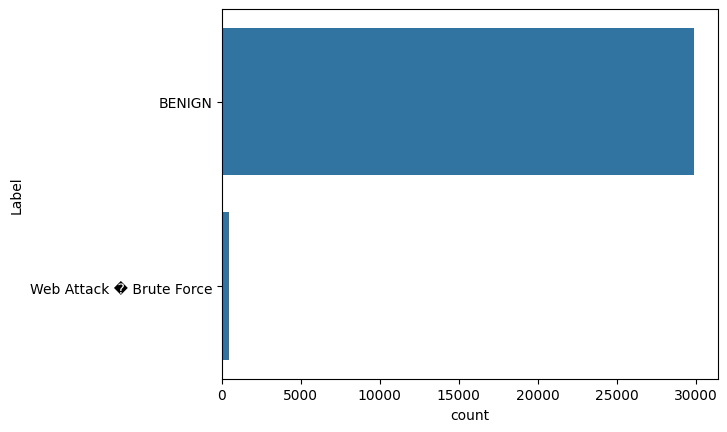

In [7]:
# Write your code here
sns.countplot(y='Label', data=df)
df['Label'].value_counts()

---

### Question 4: Data Preparation and Model Training

**Instruction:**
- Prepare the data for modeling by separating features (X) from the target (y).
- Encode the categorical 'Label' column into numerical values.
- Split the data into training (70%) and testing (30%) sets.
- Create an instance of the `DecisionTreeClassifier` and train it using the training data. Use a `random_state` of 42 for reproducibility.

**Hint:**
- Your features `X` are all columns *except* 'Label'. Your target `y` is *only* the 'Label' column.
- Use `LabelEncoder` from scikit-learn to convert text labels to numbers.
- Use the `train_test_split` function, making sure to include `random_state=42`.
- The training step is done by calling the `.fit(X_train, y_train)` method on your model.

In [8]:
# Write your code here
X = df.drop('Label', axis=1)
y = df['Label']
le = LabelEncoder()
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

---

### Question 5: Model Evaluation

**Instruction:**
- Use your trained Decision Tree model to make predictions on the test set.
- Evaluate the model's performance by generating and printing a `classification_report`. This report will show you key metrics like precision, recall, and f1-score for each class.

**Hint:**
- Use the `.predict()` method on your trained model to get predictions for `X_test`.
- Pass `y_test`, the predicted values, and `target_names=le.classes_` to the `classification_report` function to see the original label names.

In [9]:
# Write your code here
dtc.predict(X_test)
print(classification_report(y_test, dtc.predict(X_test), target_names=le.classes_))

                          precision    recall  f1-score   support

                  BENIGN       1.00      1.00      1.00      8976
Web Attack � Brute Force       0.98      0.95      0.96       133

                accuracy                           1.00      9109
               macro avg       0.99      0.97      0.98      9109
            weighted avg       1.00      1.00      1.00      9109

